In [1]:
import sympy as sy
import sympy.tensor.tensor as tr
from sympy.tensor.toperators import PartialDerivative as pd
from sympy.vector import CoordSys3D
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 定义变量

In [2]:
u0, ux, uy, uz = sy.symbols("u0,u_x, u_y, u_z")

gamma=sy.Function("gamma")(ux,uy,uz)

t, x, y, z = sy.symbols("t, x, y, z ")

rho0, rhox, rhoy, rhoz = sy.symbols("\\rho^0,\\rho_x, \\rho_y, \\rho_z")


# Ex, Ey, Ez, Bx, By, Bz = sy.symbols("Ex,Ey,Ez,Bx,By,Bz")

Ex = sy.Function('E_x')(t, x, y, z)
Ey = sy.Function('E_y')(t, x, y, z)
Ez = sy.Function('E_z')(t, x, y, z)

Bx = sy.Function('B_x')(t, x, y, z)
By = sy.Function('B_y')(t, x, y, z)
Bz = sy.Function('B_z')(t, x, y, z)

rhox = sy.Function('\\rho_x')(t, x, y, z, ux, uy, uz)
rhoy = sy.Function('\\rho_y')(t, x, y, z, ux, uy, uz)
rhoz = sy.Function('\\rho_z')(t, x, y, z, ux, uy, uz)


Coord = CoordSys3D('C')

B = Bx*Coord.i+By*Coord.j+Bz*Coord.k

E = Ex*Coord.i+Ey*Coord.j+Ez*Coord.k

u = ux*Coord.i+uy*Coord.j+uz*Coord.k

rho = rhox*Coord.i+rhoy*Coord.j+rhoz*Coord.k


In [3]:
Lorentz = tr.TensorIndexType("Lorentz", dummy_name="L")

asym2 = tr.TensorSymmetry.fully_symmetric(-2)

mu, nu, sigma = tr.tensor_indices("\\mu,\\nu,\\sigma", Lorentz)


omega_B, omega_E = sy.symbols("omega_B,omega_E")

F = tr.TensorHead("F", [Lorentz, Lorentz], asym2)

Fd = tr.TensorHead("\\mathcal{F}", [Lorentz, Lorentz], asym2)

I = tr.TensorHead("I", [Lorentz, Lorentz], tr.TensorSymmetry.fully_symmetric(2))

U=tr.TensorHead("U", [Lorentz], tr.TensorSymmetry.no_symmetry(1))

U_=tr.TensorHead("U_v", [Lorentz], tr.TensorSymmetry.no_symmetry(1))

X=tr.TensorHead("X", [Lorentz], tr.TensorSymmetry.no_symmetry(1))

Rho=tr.TensorHead("\\rho", [Lorentz], tr.TensorSymmetry.no_symmetry(1))

xi_x=tr.TensorHead("\\xi_X", [Lorentz], tr.TensorSymmetry.no_symmetry(1))

xi_u=tr.TensorHead("\\xi_U", [Lorentz], tr.TensorSymmetry.no_symmetry(1))

repl = {
    Lorentz: sy.diag(1, -1, -1, -1),
    F(-mu, -nu): [
        [0, Ex, Ey, Ez],
        [-Ex, 0, -Bz, By],
        [-Ey, Bz, 0, -Bx],
        [-Ez, -By, Bx, 0]
    ],
    Fd(mu, nu): [
        [0, -Bx, -By, -Bz],
        [Bx, 0, Ez, -Ey],
        [By, -Ez, 0, Ex],
        [Bz, Ey, -Ex, 0]
    ],
    I(mu, -nu): sy.diag(1, 1, 1, 1),
    U(mu):[gamma,ux,uy,uz],
    U_(mu):[u0,ux,uy,uz],
    X(mu):[t,x,y,z],
    Rho(mu):[rho0,rhox,rhoy,rhoz],
}


In [4]:
lambda_1=(F(mu,nu)*F(-mu,-nu)/2).replace_with_arrays(repl,[])
lambda_2=(Fd(-mu,-nu)*F(nu,mu)/4).replace_with_arrays(repl,[])

P0=(F(mu,-sigma)*F(sigma,-nu)+I(mu,-nu)*omega_B**2)/(omega_B**2+omega_E**2)
P1=(-F(mu,-sigma)*F(sigma,-nu)+I(mu,-nu)*omega_E**2)/(omega_B**2+omega_E**2)

F2=F(mu,-sigma)*F(sigma,-nu)
F3=F(mu,-sigma)*F2(sigma,-nu)
F4=F2(mu,-sigma)*F2(sigma,-nu)

# Check identities

In [ ]:


assert(lambda_1==(B.dot(B)-E.dot(E)))

identities = [
((F(mu,-sigma)*F(sigma,-nu) - Fd(mu,-sigma)*Fd(sigma,-nu))-(-I(mu,-nu)*lambda_1)),

((F(mu,-sigma)*Fd(sigma,-nu))-(I(mu,-nu)*lambda_2))
]

for eq in identities:
    display(eq)
    display(eq.replace_with_arrays(repl,[]))
    
sy.factor((F4 + lambda_1* F2 - I(mu,-nu)*(lambda_2*lambda_2)).replace_with_arrays(repl,[]))

sy.factor((F3 - Fd(mu,-nu)*lambda_2 + F(mu,-nu)*lambda_1).replace_with_arrays(repl,[]))

sy.simplify(sy.simplify(P0+P1).replace_with_arrays(repl,[]).subs({omega_B**2:B.dot(B)-E.dot(E)+omega_E**2}))

sy.simplify(sy.expand(P0(mu,-sigma)*P1(sigma,-nu)).replace_with_arrays(repl,[]).subs({omega_E**2*omega_B**2:lambda_2**2,omega_B**2:B.dot(B)-E.dot(E)+omega_E**2}))



# 推导

In [7]:
sy.simplify(F(mu,-sigma)*Fd(sigma,-nu)-I(mu,-nu)*B.dot(E)).replace_with_arrays(repl,[])

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

In [31]:
Rho_f=F(mu,-sigma)*P1(sigma,-nu)*U(nu)/(B.dot(B)-E.dot(E))

grad_rho=pd(Rho_f(mu),X(nu)).replace_with_arrays(repl,[])

#(pd(Rho_f(mu),X(nu))).replace_with_arrays(repl,[])

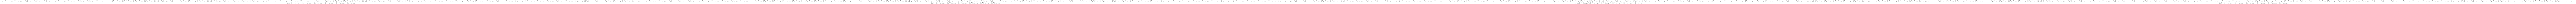

In [7]:
sy.simplify(F(mu,-sigma)*P1(sigma,-nu)*U(nu)).replace_with_arrays(repl,[]).subs({omega_E**2*omega_B**2:lambda_2**2,omega_B**2:B.dot(B)-E.dot(E)+omega_E**2})

In [22]:
sy.Matrix(F(mu,nu).replace_with_arrays(repl,[])).inv()


Matrix([
[                                                                                                                     0,  B_x(t, x, y, z)/(B_x(t, x, y, z)*E_x(t, x, y, z) + B_y(t, x, y, z)*E_y(t, x, y, z) + B_z(t, x, y, z)*E_z(t, x, y, z)),  B_y(t, x, y, z)/(B_x(t, x, y, z)*E_x(t, x, y, z) + B_y(t, x, y, z)*E_y(t, x, y, z) + B_z(t, x, y, z)*E_z(t, x, y, z)),  B_z(t, x, y, z)/(B_x(t, x, y, z)*E_x(t, x, y, z) + B_y(t, x, y, z)*E_y(t, x, y, z) + B_z(t, x, y, z)*E_z(t, x, y, z))],
[-B_x(t, x, y, z)/(B_x(t, x, y, z)*E_x(t, x, y, z) + B_y(t, x, y, z)*E_y(t, x, y, z) + B_z(t, x, y, z)*E_z(t, x, y, z)),                                                                                                                      0,  E_z(t, x, y, z)/(B_x(t, x, y, z)*E_x(t, x, y, z) + B_y(t, x, y, z)*E_y(t, x, y, z) + B_z(t, x, y, z)*E_z(t, x, y, z)), -E_y(t, x, y, z)/(B_x(t, x, y, z)*E_x(t, x, y, z) + B_y(t, x, y, z)*E_y(t, x, y, z) + B_z(t, x, y, z)*E_z(t, x, y, z))],
[-B_y(t, x, y, z)/(B_x(t, x